In [1]:
from yamlscript_histdata import histdata_parser
import mplhep as hep
import matplotlib.pyplot as plt
import pandas as pd
import boost_histogram as bh
import numpy as np

In [2]:
"""
the desired use case:

                        ┌--> this is a boost-histogram object for now
                        |
histo1 = Hist1D(histogram-object, title, fill=True, color)
histo1.make_grid()
histo1.axis.set_xaxis(hide=True)
histo1.axis.set_yaxis(axis-name)
histo1.title_loc(where)
histo1.display() -> this will draw the plot using mplhep

histo2 = PullPlotHist(histogram-object, title, color1, color2) -> the pull plot will be a sideways histogram
histo1.make_grid()
histo2.line.set_linewidth(number)
histo2.marker.set_markersize(number)
histo2.title_loc(where)
histo2.display()

histo3 = CorrMatrix(histogram-object, title, color_palette)
histo3.set_fontsize(number) -> size of numbers inside the corr matrix
histo3.line.set_style('--') -> style of lines that separate each element in the matrix
histo3.display()
"""

"\nthe desired use case:\n\n                        ┌--> this is a boost-histogram object for now\n                        |\nhisto1 = Hist1D(histogram-object, title, fill=True, color)\nhisto1.make_grid()\nhisto1.axis.set_xaxis(hide=True)\nhisto1.axis.set_yaxis(axis-name)\nhisto1.title_loc(where)\nhisto1.display() -> this will draw the plot using mplhep\n\nhisto2 = PullPlotHist(histogram-object, title, color1, color2) -> the pull plot will be a sideways histogram\nhisto1.make_grid()\nhisto2.line.set_linewidth(number)\nhisto2.marker.set_markersize(number)\nhisto2.title_loc(where)\nhisto2.display()\n\nhisto3 = CorrMatrix(histogram-object, title, color_palette)\nhisto3.set_fontsize(number) -> size of numbers inside the corr matrix\nhisto3.line.set_style('--') -> style of lines that separate each element in the matrix\nhisto3.display()\n"

In [3]:
df1, df2 = histdata_parser("CR_ttc_prefit.yaml")

histdata_parser ran in 62 ms.


In [4]:
values = df1.loc[['Samples'],'Yield'][2]
edges = df2.loc[['BinEdges'],0][0]

centres = 0.5*(np.array(edges[1:]) + np.array(edges[:-1]))

In [13]:
class BasicHisto(object): # inherit from object to make it a new-style class
    
    def __init__(self, bh, name=None, title=None):
        
        self.name = name
        self.title = title
        
        self.axes = bh.axes
        self.bin_conts = bh.values().tolist()
        self.bin_edges = np.array(bh.axes[0]).tolist()
        self.bin_centers = bh.axes.centers.tolist()
    
    
class Histo1D(BasicHisto):
    
    def __init__(self, bh, name=None, title=None, fill=True):
        super().__init__(bh, name=name, title=title)
    
    def display(self, ax=None):    
        hep.histplot(self.bin_conts, bins=self.bin_edges, ax=ax)
        if not fill:
            hep.histplot(bh, histtype="step", ax=ax)

ValueError: Plotting multiple histograms with different binning is not supported

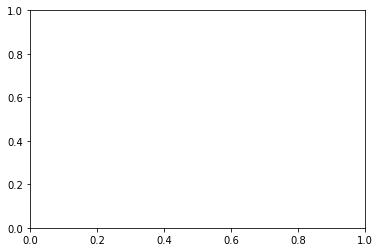

In [14]:
histogram = bh.Histogram(bh.axis.Variable(edges))
histogram.fill(centres, weight=values)

obj = Histo1D(histogram, "name1")

# obj.bin_conts, obj.bin_edges, obj.bin_centers
obj.display()